In [119]:
import pandas as pd
import csv

df = pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data.csv')
df.tail()

,distance,std,rssi,correlation,invalid_01,invalid_02
327,2.0,0.015818,-58,0.941079,0.0,0.0
328,2.0,0.007116,-59,0.972812,0.0,0.0
329,2.0,0.008899,-59,0.964866,0.0,0.0
330,2.0,0.012685,-59,0.955320,0.0,0.0
331,2.0,0.012474,-59,0.954740,0.0,0.0


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(df['rssi'], df['std'])
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

dgr = 6

poly = PolynomialFeatures(degree = dgr)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_
print(coefficient)

[ 0.00000000e+00 -8.99858826e-02 -1.00337419e-02 -4.20116885e-04
 -8.39321613e-06 -8.01929525e-08 -2.92210242e-10]


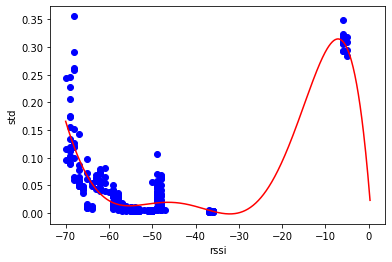

In [214]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(-70, 0.35, 0.1)
response = intercept + coefficient[1] * x_axis
for i in range(2,dgr+1):
    response += coefficient[i] * x_axis**i


plt.scatter(df['rssi'], df['std'], color='blue')
plt.plot(x_axis, response, color = 'red')

plt.xlabel("rssi")
plt.ylabel("std")
plt.savefig('rssi-std.png')

    